# IMDb Movies Dataset - Data Cleaning, Exploration, and Visualization

The following is the Jupyter notebook that contains the data exploration and visualization of the IMDb movies dataset.

My workflow will closely match the one given in Chaoter 2 and Chapter 7 of our textbook: *Hands-on Machine Learning with Scikit-Leand, Keras & Tensorflow.* [1]


## Problem Statement

The goal of this project is to train a regression model to predict the total gross of movies. This is motivated by a desire to better understand the factors that lead to higher box office revenues. The challenge lies in the limitations of our dataset, which is relatively small and does not contain many variables. Therefore, it is interesting to explore the capabilities of ML models in predicting movie success.

## Data Loading

To load the data, we write a function that gets the dataset from GitHub:

In [1]:
import os
import pandas as pd
import urllib.request
import requests

def load_movies_dataset():
    github_url = "https://raw.githubusercontent.com/dmml-heriot-watt/group-coursework-ha/main/data/raw/IMDb_All_Genres_etf_clean1.csv?token=GHSAT0AAAAAACIDJMTXQQWQLH6RERQA4O5OZKY23CA"
    requests.get(github_url)
    return pd.read_csv(github_url)

In [2]:
movies = load_movies_dataset()
movies

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


The data has been loaded correctly.

## Section 1: Data Cleaning

We will start by taking a quick look at the data. We don't want to explore the data in-depth, as we eventually want to split it into a training set and a testing set. Nevertheless, we would like to gain a general understanding of the dataset.

We begin by exploring the first 5 entries of the dataset:

In [3]:
movies.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


We can get information about the dataset and the types of the attributes it contains using the info() method:

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


Here are some observations:
   1. There are 5,562 instances in the dataset.
   2. None of the attribute has any missing rows.
   3. Not all attributes are numerical. The non-numerical attributes are:
        * Movie_Title
        * Director
        * Actors
        * Censor
        * Total_Gross
        * main_genre
        * side_genre

Out target label is *Total_Gross*. Currently, it is non-numerical. We must handle this in order for our ML models to work.

Let's investigate the *Total_Gross* target attribute:

In [5]:
movies["Total_Gross"].value_counts()

Gross Unkown    861
$0.01M           25
$0.02M           22
$0.04M           22
$0.03M           21
               ... 
$1.13M            1
$28.87M           1
$21.08M           1
$44.18M           1
$9.11M            1
Name: Total_Gross, Length: 3501, dtype: int64

We observe the following:
   * The values of this attribute has the following format "$X.YZM"
   * There are 861 entires with the value "Gross Unknown"
    
Let us use pandas and a Lambda function to convert the format to a float if the total gross is known and convert the format to np.nan if the value = "Gross Unknown".

In [6]:
import numpy as np
movies["Total_Gross"] = movies["Total_Gross"].apply(lambda x: float(x.replace("$","").replace("M",""))*1000000 if x!="Gross Unkown" else np.nan )

We will drop any residual NaNs:

In [7]:
movies.dropna(subset=["Total_Gross"], inplace=True)

Let us double-check that the changes have been applied:

In [8]:
movies["Total_Gross"].value_counts()

10000.0       25
40000.0       22
20000.0       22
30000.0       21
50000.0       18
              ..
28870000.0     1
21080000.0     1
44180000.0     1
2420000.0      1
9110000.0      1
Name: Total_Gross, Length: 3500, dtype: int64

Our target label, *Total_Groos*, looks clean! 

Let us explore the rest of the non-numerical attributes and determine how we should encode them.

We start by the *Censor* attribute:

In [9]:
movies["Censor"].value_counts()

UA           1003
A             972
U             931
R             818
PG-13         380
Not Rated     303
PG            117
18             64
16             27
13             19
15+            16
UA 16+          9
7               9
G               8
(Banned)        7
All             4
UA 13+          3
Unrated         3
12+             2
U/A             2
UA 7+           2
M/PG            1
NC-17           1
Name: Censor, dtype: int64

It is important to note the UA and U ar enot the same same, and neither are UA and UA 13+. We can't just eliminate UA 13+ and U and replace them with UA's to simplify the data. This oversimplification may overfit our model on thetraining set and will cause to perform terribly on the testing set.

Then, we will eplore the *main_genre* attribute: 

In [10]:
movies["main_genre"].value_counts()

Action       1326
Comedy       1203
Drama         828
Crime         355
Biography     302
Animation     279
Adventure     263
Horror        108
Mystery        19
Fantasy        11
Western         4
Film-Noir       3
Name: main_genre, dtype: int64

Genre plays an important role in a movie's total gross. *Action* movies tend to have the highest box office gross [[2]](https://www.bcheights.com/2017/04/26/the-appeal-of-the-action-genre/).

We can investigate the movies with the best Box Office performance:

In [11]:
# Get the movies that have a gross revenue: > 50,000,000
high_gross_movies = movies[movies['Total_Gross'] > 50000000]

# Extract the information
genre_movie_counts = high_gross_movies["main_genre"].value_counts().reset_index()
genre_movie_counts.columns = ["main_genre", "Frequency"]

# Investigate:
genre_movie_counts

,main_genre,Frequency
0,Action,602
1,Comedy,382
2,Animation,185
3,Drama,173
4,Adventure,104
5,Biography,73
6,Crime,65
7,Horror,38
8,Mystery,5
9,Fantasy,4


As expected!

We can also use *seaborn* to visualize categorical data. In this case, it is helpful to plot a *categorical scatterplot* [[3]](https://seaborn.pydata.org/tutorial/categorical.html).

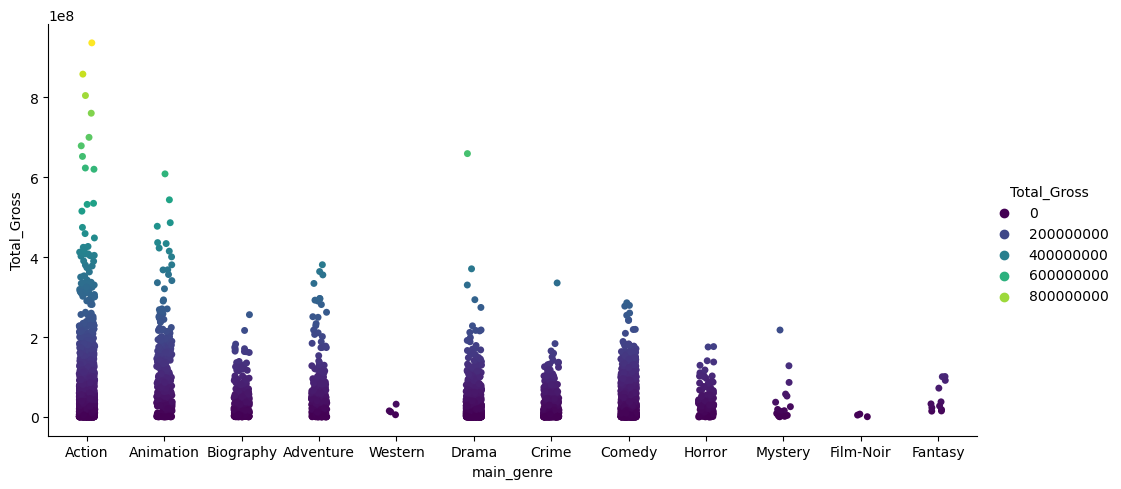

In [12]:
import seaborn as sns

sns.catplot(data=movies, x="main_genre", y="Total_Gross", aspect=2, hue="Total_Gross", palette='viridis')

We can't solely rely on the figure. Doing so, we might rank *Animation* higher than *Comedy* (but it should be vice-versa, per our statistical results in the table above). Regardless, it is still helpful to visualize our findings.

We will use an *OrdinalEncoder*, instead of one-hot-encoding, to encode the *main_genre* attribute. Let us maintain a list of the desired ordering:

In [13]:
ordered_genre = [["Action", "Comedy", "Animation", "Drama", "Adventure", "Biography", "Crime", "Horror", "Mystery", "Fantasy", "Western", "Film-Noir"]]
ordered_genre

[['Action',
  'Comedy',
  'Animation',
  'Drama',
  'Adventure',
  'Biography',
  'Crime',
  'Horror',
  'Mystery',
  'Fantasy',
  'Western',
  'Film-Noir']]

Next, we will investigate the *side_genre* attribute:

In [14]:
movies["side_genre"].value_counts()

 Drama,  Romance       288
 Adventure,  Comedy    270
 Romance               269
 Drama                 265
 Crime,  Drama         254
                      ... 
 Mystery,  War           1
 Action,  Comedy         1
 Adventure,  War         1
 Fantasy,  War           1
 Fantasy,  Musical       1
Name: side_genre, Length: 140, dtype: int64

I will use a *OneHotEncoder* to encode this attribute. We can go with an *OrdinalEncoder* as we did with the previous attribute, but we will end up with a list of ordered side genres that is very long.

Let's explore the *Director* attribute now:

In [15]:
movies["Director"].value_counts()

Woody Allen                            37
Clint Eastwood                         30
Steven Spielberg                       27
Ron Howard                             22
Martin Scorsese                        21
                                       ..
George Scribner                         1
Directors:Eric Darnell, Tim Johnson     1
Gil Kenan                               1
Chris Miller                            1
Tom Putnam                              1
Name: Director, Length: 1921, dtype: int64

We will use a *OneHotEncoder* to encode this attribute. 

The last non-numerical attribute to explore is *Movie_Title*:

In [16]:
movies["Movie_Title"].value_counts()

Robin Hood                      3
Taxi                            3
Aladdin                         2
RoboCop                         2
The Lion King                   2
                               ..
Patch Adams                     1
Selena                          1
Bugsy                           1
Battle of the Sexes             1
Superbabies: Baby Geniuses 2    1
Name: Movie_Title, Length: 4628, dtype: int64

We have two choicecs:
   * Keep the data by encoding it with a OneHotEncoder. This will significantly increase the size of the sparse matrix (the output of fit_transform on a OneHotEncoder) and slow down our models. I have tried this approach before but found no significant improvement in the prediction accuracy of any of the models (verified using the feature_importances_ of Random Forest).
   
   * Entirely drop the attribute. This will make our models run faster and there is no (major) loss in prediction accuracy. I will go with this approach.

In [17]:
movies = movies.drop("Movie_Title", axis=1)
movies

,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
1,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534860000.0,Action,"Crime, Drama"
2,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377850000.0,Action,"Adventure, Drama"
3,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292580000.0,Action,"Adventure, Sci-Fi"
4,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342550000.0,Action,"Adventure, Drama"
5,2001,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",8.8,178,U,315540000.0,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...
5555,2005,Lawrence Guterman,"Jamie Kennedy, Traylor Howard, Alan Cumming, L...",2.2,94,U,17020000.0,Comedy,"Family, Fantasy"
5557,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,14190000.0,Comedy,Sci-Fi
5558,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,30000.0,Comedy,Romance
5559,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,4920000.0,Comedy,"Musical, Romance"


Let us plot histograms of the numerical attributes:

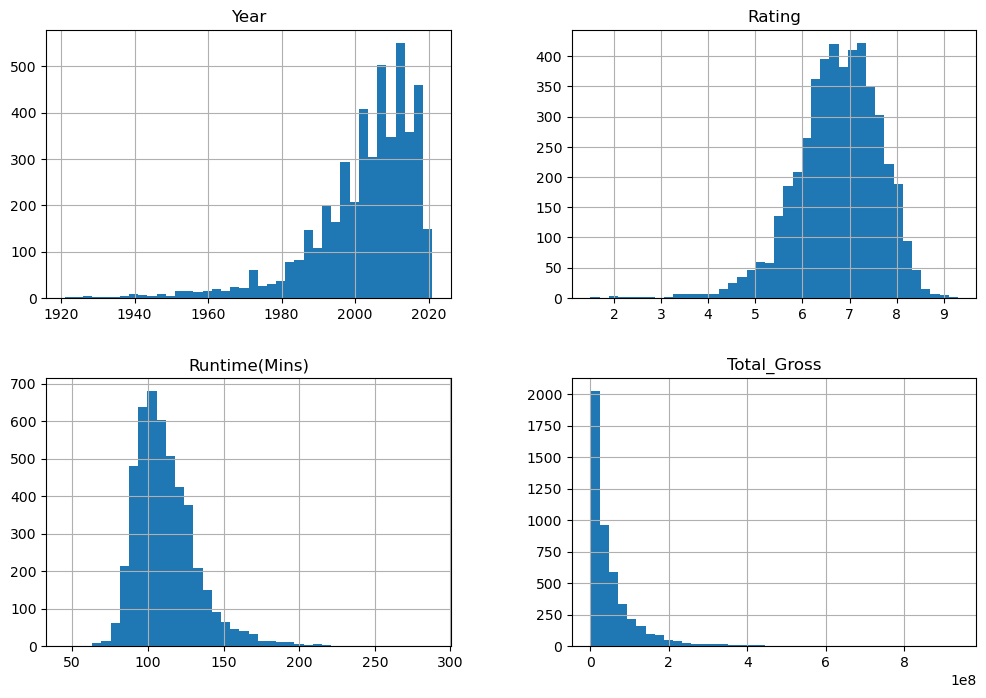

In [18]:
import matplotlib.pyplot as plt
movies.hist(bins=40, figsize=(12, 8))
plt.show()

The following attributes have heavy-tail distribution:

* "Year": left-skewed
* "Runtime(Mins)": right-skewed
* "Total_Gross": right-skewed

We can apply transformations to these attribute to make thir distribution more symmetrical and bell-shaped. We will discuss the appropriate transformations to use later.


### 1.1 Adjusting Total Gross for Inflation

One final thing to do is to adjust the "Total_Gross" values for inflation. This is important so our final ML model will be useful.

There are a couple of ways to do this. I followed the approach outlined in [[4]](https://medium.com/@alvaro.henriquez/adjusting-for-inflation-in-pandas-9cffc0d888ac). I simply downloaded the data as a csv from: https://www.in2013dollars.com/us/inflation/1930?amount=1.

In [19]:
inflation_data = pd.read_csv("C:\\Users\\Rami\\Downloads\\inflation_data.csv")  
inflation_data.head()

,year,amount,inflation rate
0,1930,1.00,-0.02
1,1931,0.91,-0.09
2,1932,0.82,-0.10
3,1933,0.78,-0.05
4,1934,0.80,0.03


Let us now use this DataFrame to adjust the *Total_Gross* of our movies DataFrame:

In [20]:
movies = movies.merge(inflation_data, left_on="Year", right_on="year", how="left")

# A function to make inflation adjustemetn easier
def adjust_for_inflation(row):
    if pd.notna(row["inflation rate"]):
        inflation_factor = 1 + (row["inflation rate"] / 100) 
        return row["Total_Gross"] / inflation_factor
    else:
        return row["Total_Gross"]
    
# We can apply the function now to our "Total_Gross" column    
movies["Adjusted_Total_Gross"] = movies.apply(adjust_for_inflation, axis=1)

# Verify the everything works:
movies[["Total_Gross", "Adjusted_Total_Gross"]]

,Total_Gross,Adjusted_Total_Gross
0,534860000.0,5.346461e+08
1,377850000.0,3.777744e+08
2,292580000.0,2.925215e+08
3,342550000.0,3.424815e+08
4,315540000.0,3.154454e+08
...,...,...
4696,17020000.0,1.701490e+07
4697,14190000.0,1.418433e+07
4698,30000.0,2.998800e+04
4699,4920000.0,4.919016e+06


In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4700
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  4701 non-null   int64  
 1   Director              4701 non-null   object 
 2   Actors                4701 non-null   object 
 3   Rating                4701 non-null   float64
 4   Runtime(Mins)         4701 non-null   int64  
 5   Censor                4701 non-null   object 
 6   Total_Gross           4701 non-null   float64
 7   main_genre            4701 non-null   object 
 8   side_genre            4701 non-null   object 
 9   year                  4693 non-null   float64
 10  amount                4693 non-null   float64
 11  inflation rate        4693 non-null   float64
 12  Adjusted_Total_Gross  4701 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 514.2+ KB


Let us drop the original *Total_Gross* columns and the columns added from the infaltion dataset:

In [22]:
# Drop original "Total_Gross"
movies.drop(columns=["Total_Gross"], inplace=True)

# Rename the adjusted column
movies.rename(columns={"Adjusted_Total_Gross": "Total_Gross"}, inplace=True)
movies.dropna(subset=["Total_Gross"], inplace=True)

# Drop the rest of the augmented attributes
movies = movies.drop("inflation rate", axis=1)
movies = movies.drop("year", axis=1)
movies = movies.drop("amount", axis=1)

movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4700
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4701 non-null   int64  
 1   Director       4701 non-null   object 
 2   Actors         4701 non-null   object 
 3   Rating         4701 non-null   float64
 4   Runtime(Mins)  4701 non-null   int64  
 5   Censor         4701 non-null   object 
 6   main_genre     4701 non-null   object 
 7   side_genre     4701 non-null   object 
 8   Total_Gross    4701 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 367.3+ KB


### 1.2 Handling Outliers

It is important to handle outliers to increase the accuracy of our prediction models. One way to ahndle outliers is to remove a small percentage of the instances from the top and bottom of the dataset distribution. This method is known as the *Interquartile Range Method* [[5]](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/).

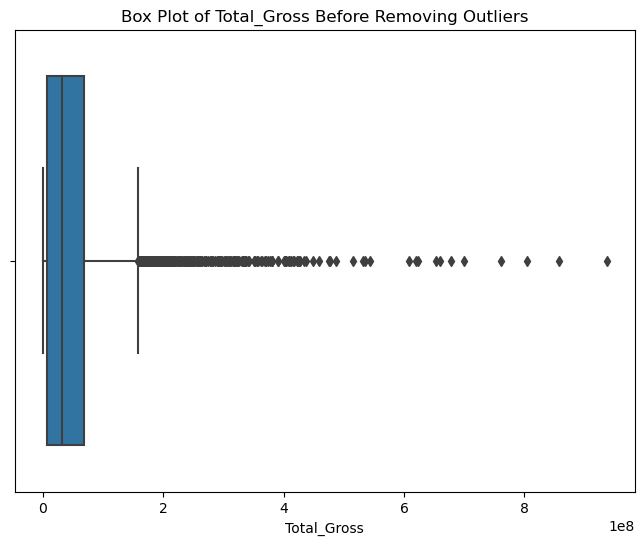

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=movies["Total_Gross"])
plt.title("Box Plot of Total_Gross Before Removing Outliers")
plt.show()

In [24]:
q_low = movies["Total_Gross"].quantile(0.015)
q_hi = movies["Total_Gross"].quantile(0.985)

movies = movies[(movies["Total_Gross"] < q_hi) & (movies["Total_Gross"] > q_low)]

movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 2 to 4700
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4551 non-null   int64  
 1   Director       4551 non-null   object 
 2   Actors         4551 non-null   object 
 3   Rating         4551 non-null   float64
 4   Runtime(Mins)  4551 non-null   int64  
 5   Censor         4551 non-null   object 
 6   main_genre     4551 non-null   object 
 7   side_genre     4551 non-null   object 
 8   Total_Gross    4551 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 355.5+ KB


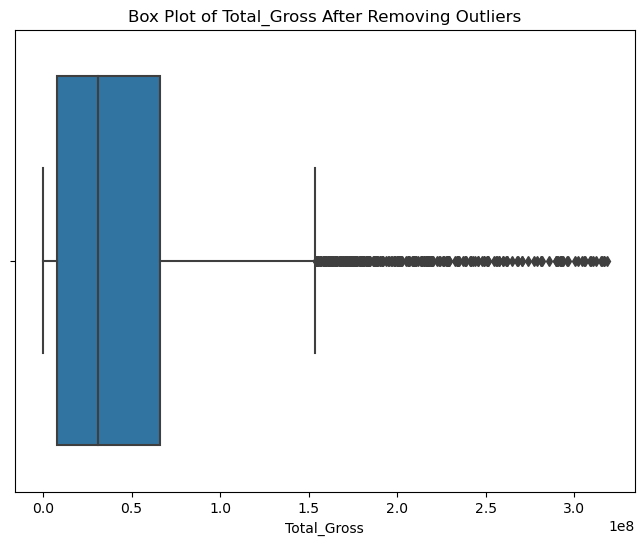

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies["Total_Gross"])
plt.title("Box Plot of Total_Gross After Removing Outliers")
plt.show()

Notice the difference between the two box plots.
   * In the first box plot, the outliers (represented as dots to the right of the whisker)
    extend too far to the right.
   * In the second box plot, the outliers don't extend as far to the right.
   
We note that despite removing some of the outliers, we still have many outliers left in our dataset. This is an added complexity, and it will make the prediction of ML models less accurate. For this reason, we need to be more generours when applying scalers (a StandardScaler() alone will not do the job). We will revisit this in a later section.

We have 4,551 instances left in the dataset. 

## Section 2: Create a Test Set

Before further data exploration and visualization, it is important to separate the dataset into a testing set and a training set. This is to avoid noticing any patterns in the testing set, which may lead us to select a particular ML model, and we may end up with a model that is too optimistic and bad at generalization.

In [26]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(movies, test_size=0.2, random_state=42)

## Section 3: Further Data Exploration and Visualization

We will dive in-depth into exploring and visualizing our data. Since our training set is small, we can directly work on it. We will eventually use transformations on the full training set, so we start by making a copy of it:

In [27]:
movies = train_set.copy()

### 3.1 Investigate Correlations

We start by looking for correlations. We will compute the *standard correlation coefficient*:

In [28]:
import warnings
warnings.filterwarnings('ignore')  # This is to keep the notebook clean and hide all future warnings

corr_matrix = movies.corr()
corr_matrix["Total_Gross"].sort_values(ascending=False)

Total_Gross      1.000000
Runtime(Mins)    0.103909
Year             0.089544
Rating           0.000317
Name: Total_Gross, dtype: float64

We can also investigate correlation between attributes using a *scatter matrix*, which is a plot of every numerical attribute against every other numerical attribute:

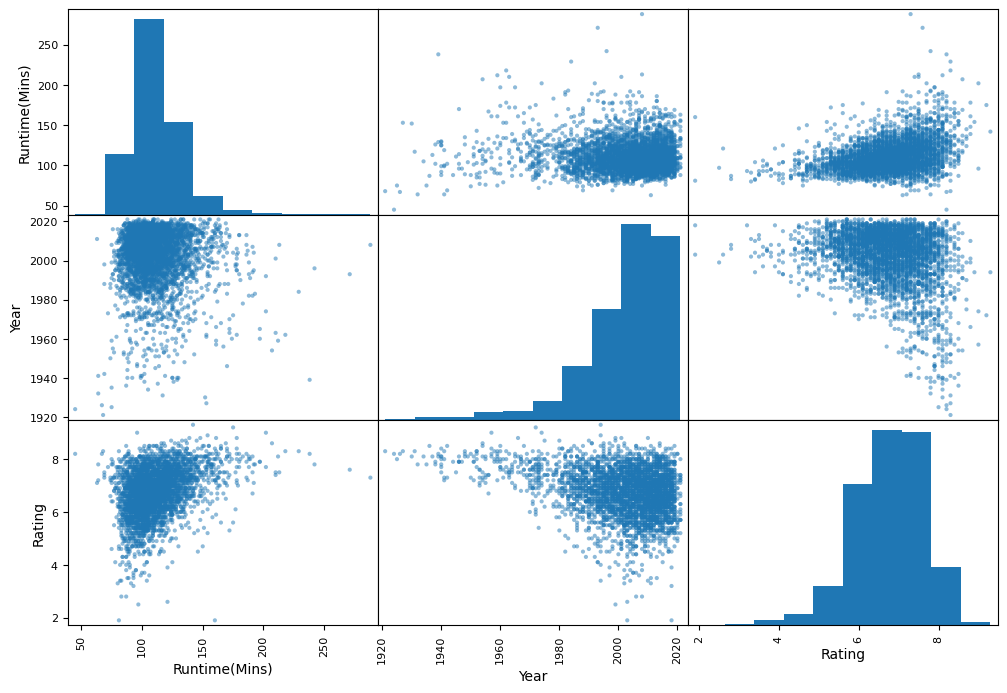

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["Runtime(Mins)", "Year", "Rating", "Actors"]
scatter_matrix(movies[attributes], figsize=(12, 8))
plt.show()

## Section 4: Preapre the Data for ML

We revert to a clean training set, and separate the predictors and the labels. This is because we don't want to apply transformations that we will apply to the predictors on the labels.

In [30]:
movies = train_set.drop("Total_Gross", axis=1)
movies_labels = train_set["Total_Gross"].copy()

movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 4279 to 920
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           3640 non-null   int64  
 1   Director       3640 non-null   object 
 2   Actors         3640 non-null   object 
 3   Rating         3640 non-null   float64
 4   Runtime(Mins)  3640 non-null   int64  
 5   Censor         3640 non-null   object 
 6   main_genre     3640 non-null   object 
 7   side_genre     3640 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 255.9+ KB


### 4.1 Feature Scaling

We recall our historgram plots that we did earlier.



We notice that the input numerical attributes have very different scales. If we don't do feature scaling, most ML models will be biased toward ignoring some of our attributes' values.



Since the two attributes, "Year" and "Runtime(Mins)", have a distribution that is heavy tail (see histogram above), we should first transform the features before scaling them. The goal is to make the distribution of any attribute symmetric.



The appropriate transformation to make is the log transformation: we replace the feature with its logarithm. Then, I have found that applying a MinMaxScaler() for log-transformed attributes gives better results than a StandardScaler(), so I will go with that here.



Another scaler we can use is the MaxAbsScaler(). It is appropriate to use this scaler to scale sparse data (as in our case). We use this for attributes that will not undergo a log transformation.



I have also tried using a RobustScaler(), but that did not help much.



Recall that we also said we would apply a "OneHotEncoder()" to most of our non-numerical attributes, and that we will apply an "OrdinalEncoder()" to our "main_genre" attribute. This can also be done in the pipeline.

Here is a table summarizing our transformation process:


| Attribute       |Type | Encoding | Scaling (After Encoding)                                                   |
|-----------------| --- | --- |----------------------------------------------------------------------------|
| *Year*          | Numerical | N/A | Log-Transformation → MinMaxScaler() → MaxAbsScaler() → StandardScaler()    |
| *Director*      | Non-numerical | OneHotEncoder() | MaxAbsScaler() → StandardScaler()                                          |
| *Actors*        | Non-numerical | OneHotEncoder() | MaxAbsScaler() → StandardScaler()                                          |
| *Rating*        | Numerical | N/A | MaxAbsScaler() → StandardScaler()                                          |
| *Runtime(Mins)* | Numerical | N/A | Log-Transformation → MinMaxScaler() → MaxAbsScaler() → StandardScaler()    |
| *Censor*        | Non-numerical | OneHotEncoder() | MaxAbsScaler() → StandardScaler()                                          |
| *main_genre*    | Non-numerical | OrdinalEncoder() | MaxAbsScaler() → StandardScaler()                                          |
| *side_genre*    | Non-numerical | OneHotEncoder() | MaxAbsScaler() → StandardScaler()                                          |


### 4.2 The Transformation Pipeline

As indicated in our textbook, we can leverage the Pipepline class of scikit-lean to create a "*preprocessing pipeline that takes the entire dataset and applies each transformer to the appropriate columns*" [1]

The components of the pipeline will be similar to the outline presented above. 

In [31]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MaxAbsScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.preprocessing import MinMaxScaler, RobustScaler

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    MinMaxScaler()
)

default_num_pipeline = make_pipeline(
    MaxAbsScaler(),
    StandardScaler()
)

genre_pipeline = make_pipeline(
    OrdinalEncoder(categories=ordered_genre)
)
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing = ColumnTransformer([
        ("log", log_pipeline, ["Year", "Runtime(Mins)"]),
        ("genre_ordinal", genre_pipeline, ["main_genre"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

Let us fit and transform our training set:

In [32]:
movies_prepared = preprocessing.fit_transform(movies)
movies_prepared.shapemovies_prepared = preprocessing.fit_transform(movies)
movies_prepared

<3640x5436 sparse matrix of type '<class 'numpy.float64'>'
	with 31771 stored elements in Compressed Sparse Row format>

### 4.3 When to Train/Test Split

We should split our dataset into a training set and a testing set before applying any transformations. This is to prevent any informatioation leakage, which can lean to over-optimistic results and unrealistic performance evaluations. If we don't split before applying transformations, the train set would contain information from the test set. What happens is that once new data is fed to the model (from outside the dataset), it will perform poorly.


## Section 5: Select and Train a Base Model

### 5.1 RMSE

*Root-Mean-Squared-Error* (RMSE) will be used for the following reasons:

1. It punishes larger errors more than smaller errors; therefore, it provides a more realistic assessment of the model's performance. 
2. Normalizing the RMSE helps in comparing the score of a ML model with scores achieved by other models that are trained on different scales.

### 5.2 Training a Linear Regression Model

Before trying a Decision Tree model (and other Ensembles that leverage it), and tuning their hyperparameters and so on, I would like to start by training a Linear Regression model. This will serve as a quick model that other models can be compared to. Moreover, it is an easy hack to allow me to test that my data preparation and data cleaning were done correctly.

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(movies, movies_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                                   OrdinalEncoder(categories=[['Action',
                                                                                               'Comedy',
                                                                                               'Animation',
                                                                                               'Drama',
                                                                                               'Adventure',
                                                                                               'Biography',
                                                                                               'Crime',
                                                                                               'Horror',
                                                                                               'Mystery',
                                                                                               'Fantasy',
                                                                                               'Western',
                                                                                               'Film-Noir']]))]),
                                                  ['main_genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000028846061250>)])),
                ('linearregression', LinearRegression())])

Use the trained *Linear Regression* model to make predictions on the movies dataset:

In [63]:
movies_predictions = lin_reg.predict(movies)

We can evaluate the Linear Regression model's performance on the trainign set:

In [64]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(movies_labels, movies_predictions, squared=False)
lin_rmse

483276.18722301186

### 5.3 Cross-Validation Evaluation

We can use Scikit-Learns's *k_-fold cross-validation* to get the cross-validation score. This is a more accurate evaluation method. Cross-validation helps in making our training set more representative: the model can use the training set to generalize well against unseen data. 

In [65]:
from sklearn.model_selection import cross_val_score
lin_rmses = -cross_val_score(lin_reg, movies, movies_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    1.000000e+01
mean     2.240501e+08
std      9.385236e+07
min      5.739925e+07
25%      2.288375e+08
50%      2.547323e+08
75%      2.636599e+08
max      3.518344e+08
dtype: float64

The true mean of the labels is:

In [66]:
movies_labels.mean()

47922201.353391394

Thus, the normalized RMSE (NRMSE) is:

In [67]:
print("NRMSE of Linear Regression = ", lin_rmses.mean() / movies_labels.mean())

NRMSE of Linear Regression =  4.675288471682255


## Section 6: Experiment with Other Models

### 6.1 Decision Tree

Let us start with a *Decision Tree*:

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt_tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
dt_tree_reg.fit(movies, movies_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                                                               'Drama',
                                                                                               'Adventure',
                                                                                               'Biography',
                                                                                               'Crime',
                                                                                               'Horror',
                                                                                               'Mystery',
                                                                                               'Fantasy',
                                                                                               'Western',
                                                                                               'Film-Noir']]))]),
                                                  ['main_genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000028846061250>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Now, we use the *Decision Tree* model to make predictions and evaluate its cross-validation score:

In [40]:
movies_predictions = dt_tree_reg.predict(movies)
tree_rmses = -cross_val_score(dt_tree_reg, movies, movies_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

count    1.000000e+01
mean     5.477880e+07
std      4.547337e+06
min      4.813420e+07
25%      5.150334e+07
50%      5.521847e+07
75%      5.716879e+07
max      6.243202e+07
dtype: float64

We can calculate the NRMSE score:

In [41]:
print("NRMSE of Decision Tree = ", tree_rmses.mean() / movies_labels.mean())

NRMSE of Decision Tree =  1.1430776671776206


The *Decision Tree* model performs better than the *Linear Regression* model.

### 6.2 Random Forest

Let us use a *Random Forest* model to make predictions. A *Random Forest* is an ensemble ML model that fits a number of decision tree regressors on parts of the dataset and uses averaging to increase their prediction accuracy [[6]]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [42]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                          RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, movies, movies_labels,
                               scoring="neg_root_mean_squared_error",
                                cv=10,
                                n_jobs=-1)
pd.Series(forest_rmses).describe()

count    1.000000e+01
mean     4.565302e+07
std      3.577763e+06
min      3.916027e+07
25%      4.390238e+07
50%      4.558694e+07
75%      4.738095e+07
max      5.251790e+07
dtype: float64

Now, we get the NRMSE of the *Random Forest* model:

In [43]:
print("NRMSE of Random Forest = ", forest_rmses.mean() / movies_labels.mean())

NRMSE of Random Forest =  0.9526485843048041


The *Random Forest* model performed very well compared to *Decision Tree* and *Linear Regression* models.

### 6.3 Gradient Boosted Decision Trees

*Gradient Boosted Decision Trees* (*GBDT*) is another ensemble ML model. GBDT is an ensemble of *decision trees* where tree are added one at a time to the ensemble. Each added tree is fit to correct the prediction errors made be the previous decision tree model [[7]](https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/).

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gbdt_reg = make_pipeline(preprocessing, GradientBoostingRegressor(
    loss='squared_error',
    random_state=42))
gbdt_rmses = -cross_val_score(gbdt_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(gbdt_rmses).describe()

count    1.000000e+01
mean     4.629474e+07
std      3.232908e+06
min      4.123956e+07
25%      4.515758e+07
50%      4.554240e+07
75%      4.738289e+07
max      5.368460e+07
dtype: float64

*GDBT* did not perform as well as the *Random Forest* model.

The NRMSE of the GDBT is:

In [45]:
print("NRMSE of GBDT = ", gbdt_rmses.mean() / movies_labels.mean())

NRMSE of GBDT =  0.9660394906320112


### 6.4 Extra Trees

*Extremely Randomized Trees*, or *Extra Trees*, are a variant of the *Random Forest* model. *Extra Trees*, unlike *Random Forest*, splits are made at random.

In [46]:
from sklearn.ensemble import ExtraTreesRegressor

extra_forest_reg = make_pipeline(preprocessing,
                          ExtraTreesRegressor(random_state=42))
extra_forest_rmses = -cross_val_score(extra_forest_reg, movies, movies_labels,
                               scoring="neg_root_mean_squared_error",
                                cv=10,
                                n_jobs=-1)
pd.Series(extra_forest_rmses).describe()



count    1.000000e+01
mean     4.724134e+07
std      3.819065e+06
min      4.114796e+07
25%      4.487563e+07
50%      4.639944e+07
75%      4.938257e+07
max      5.384222e+07
dtype: float64

In [47]:
print("NRMSE of Extra-Trees = ", extra_forest_rmses.mean() / movies_labels.mean())

NRMSE of Extra-Trees =  0.9857923216828568


### 6.5 AdaBoost

An *AdaBoost* fits weak learners (decision trees, in our case) on repeatedly modified versions of the data. Then, the predictions from all of them is combined using a weighted majority vote to return the final prediction [[8]]( https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor).

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

Ada_Boost_reg = make_pipeline(preprocessing,
                             AdaBoostRegressor(
                                  DecisionTreeRegressor(random_state=42),
                                  random_state=42))
Ada_Boost_rmses = -cross_val_score(Ada_Boost_reg, movies, movies_labels,
                               scoring="neg_root_mean_squared_error",
                                cv=10,
                                n_jobs=-1)
pd.Series(Ada_Boost_rmses).describe()



count    1.000000e+01
mean     4.736903e+07
std      3.784332e+06
min      3.994280e+07
25%      4.584362e+07
50%      4.725426e+07
75%      4.883171e+07
max      5.425911e+07
dtype: float64

In [49]:
print("NRMSE of AdaBoost = ", Ada_Boost_rmses.mean() / movies_labels.mean())

NRMSE of AdaBoost =  0.988456954300905


### 6.6 Voting Regressor

A *Voting Regressor* combines various ML models and returns the average of their predictions [[8]]( https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor).

In the following, we combine a *Random Forest* and *Gradient Boosted Decision Trees*:

In [50]:
from sklearn.ensemble import VotingRegressor

reg1 = RandomForestRegressor(random_state=42)
reg2 = GradientBoostingRegressor(loss='squared_error', random_state=42)

voting_reg = make_pipeline(preprocessing, VotingRegressor(estimators=[('rf', reg1), ('gb', reg2)]))
voting_reg.fit(movies, movies_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                                                               'Film-Noir']]))]),
                                                  ['main_genre']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000028846061250>)])),
                ('votingregressor',
                 VotingRegressor(estimators=[('rf',
                                              RandomForestRegressor(random_state=42)),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42))]))])

In [51]:
voting_rmses = -cross_val_score(voting_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(voting_rmses).describe()

count    1.000000e+01
mean     4.504750e+07
std      3.400001e+06
min      3.919672e+07
25%      4.332842e+07
50%      4.455557e+07
75%      4.645932e+07
max      5.226792e+07
dtype: float64

In [52]:
print("NRMSE of Voting = ",voting_rmses.mean() / movies_labels.mean())

NRMSE of Voting =  0.9400131805357883


### 6.7 Stacking

*Stacking* combined estimators to reduce their biases. The predictions of each estimator are stacked together. Each prediction is used as an input to a final estimator to computer the prediction [[8]]( https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor).

In [53]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

estimators = [
    ("RF", RandomForestRegressor(random_state=42)),
    ("GradBoost", GradientBoostingRegressor(loss="squared_error", random_state=42)),
    ("ExtraTrees", ExtraTreesRegressor(random_state=42))]

stacking_reg = make_pipeline(preprocessing,
                             StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42)))
stacking_reg.fit(movies, movies_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000028846061250>)])),
                ('stackingregressor',
                 StackingRegressor(estimators=[('RF',
                                                RandomForestRegressor(random_state=42)),
                                               ('GradBoost',
                                                GradientBoostingRegressor(random_state=42)),
                                               ('ExtraTrees',
                                                ExtraTreesRegressor(random_state=42))],
                                   final_estimator=RandomForestRegressor(random_state=42)))])

In [54]:
stacking_rmses = -cross_val_score(stacking_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(stacking_rmses).describe()

count    1.000000e+01
mean     4.609765e+07
std      3.579693e+06
min      3.962868e+07
25%      4.424853e+07
50%      4.579395e+07
75%      4.823448e+07
max      5.124189e+07
dtype: float64

In [55]:
print("NRMSE of Stacking = ", stacking_rmses.mean() / movies_labels.mean())

NRMSE of Stacking =  0.9619267748480618


### 6.8 Conclusion of Training the Models on the Training Set

| Regression Model | RMSE | NRMSE |
|----------|----------|----------|
| Linear Regression | 71,101,500 | 1.46 |
| Decision Tree | 56,129,330 | 1.15 |
| Random Forest | 45,992,080 | 0.94 |
| Extra Trees | 48,204,900 | 0.99 |
| Gradient Boosted Decision Trees | 47,244,350 | 0.97 |
| AdaBoost  | 47,534,090 | 0.98 |
| **Voting** | **45,583,420** | **0.94** |
| Stacking | 47,119,790 | 0.97 |


## Section 7: Hyperparameters Tuning

### 7.1 Random Search

We can use a random search to explore the space of hyperparamteres. It is much quicker than using a grid search.

In [69]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

We start by doing a random search for the *Random Forest* model:

In [70]:
param_distribs = {'random_forest__max_features': randint(low=2, high=20),
                 'random_forest__max_depth': randint(low=1000, high=2000),
                 'random_forest__n_estimators': randint(low=1000, high=1500)}

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42, n_jobs=-1)),
])

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

rnd_search.fit(movies, movies_labels)

rnd_search.best_params_

{'random_forest__max_depth': 1308,
 'random_forest__max_features': 3,
 'random_forest__n_estimators': 1343}

In [71]:
rf_model = rnd_search.best_estimator_

We can get the feature importances using the *Random Foest* model:

In [73]:
feature_importances = rf_model["random_forest"].feature_importances_
sorted(zip(feature_importances,
          rf_model["preprocessing"].get_feature_names_out()),
      reverse=True)

[(0.048185531835142965, 'log__Runtime(Mins)'),
 (0.04523989400631471, 'remainder__Rating'),
 (0.0414416321156439, 'log__Year'),
 (0.021160497391911535, 'cat__Censor_R'),
 (0.018913039613140663, 'cat__Censor_UA'),
 (0.01676925618839516, 'genre_ordinal__main_genre'),
 (0.012358125090707715, 'cat__Censor_U'),
 (0.012205204717491331, 'cat__side_genre_ Adventure,  Comedy'),
 (0.0113498686174554, 'cat__side_genre_ Adventure,  Sci-Fi'),
 (0.010447610444867273, 'cat__main_genre_Animation'),
 (0.009712426357960033, 'cat__main_genre_Action'),
 (0.007431594675828932, 'cat__Censor_A'),
 (0.006428115875813887, 'cat__main_genre_Drama'),
 (0.005940301375766624, 'cat__Censor_Not Rated'),
 (0.005038663980281292, 'cat__Director_Steven Spielberg'),
 (0.004708363186219875, 'cat__Censor_PG-13'),
 (0.0046893090763458, 'cat__Director_David Yates'),
 (0.004372209831059694, 'cat__side_genre_ Adventure,  Fantasy'),
 (0.003861648796432497, 'cat__main_genre_Comedy'),
 (0.0037911915118701927, 'cat__side_genre_ Adv

We can try the best parameters on the training set:

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(max_depth=1308,
                                                 max_features=3,
                                                 n_estimators=1343,
                                                 random_state=42,
                                                 n_jobs=-1))
forest_rmses = -cross_val_score(forest_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(forest_rmses).describe()

count    3.000000e+00
mean     4.397829e+07
std      2.258038e+06
min      4.169479e+07
25%      4.286245e+07
50%      4.403011e+07
75%      4.512004e+07
max      4.620998e+07
dtype: float64

After this, we can try varying other hyperparameters:

In [75]:
param_distribs = {'random_forest__min_samples_split': randint(low=1, high=5)}

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(max_depth=1450,
                                                 max_features=3,
                                                 n_estimators=1450,
                                                 random_state=42,
                                                 n_jobs=-1)),
])

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

rnd_search.fit(movies, movies_labels)

rnd_search.best_params_

{'random_forest__min_samples_split': 2}

This is the same as the default value, let us stick with it.

Below, we vary "min_samples_leaf":

In [72]:
param_distribs = {'random_forest__min_samples_leaf': randint(low=1, high=3)}

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(max_depth=1308,
                                                 max_features=3,
                                                 n_estimators=1343,
                                                 random_state=42,
                                                 n_jobs=-1)),
])



rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

rnd_search.fit(movies, movies_labels)

rnd_search.best_params_

{'random_forest__min_samples_leaf': 1}

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(max_depth=1308,
                                                 max_features=3,
                                                 n_estimators=1343,
                                                 random_state=42,
                                                 n_jobs=-1))
forest_rmses = -cross_val_score(forest_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(forest_rmses).describe()

count    1.000000e+01
mean     4.408859e+07
std      2.319549e+06
min      3.908082e+07
25%      4.303077e+07
50%      4.459353e+07
75%      4.487054e+07
max      4.806537e+07
dtype: float64

We can use random search for *Gradient Boosted Decision Trees*:

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("GBDT", GradientBoostingRegressor()),
])

param_distribs = {
                 'GBDT__loss': ["squared_error"],
                 'GBDT__learning_rate': [0.1, 0.2],
                 'GBDT__max_depth': randint(low=20, high=40),
                 'GBDT__n_estimators': randint(low=1800, high=2300)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)

rnd_search.fit(movies, movies_labels)
rnd_search.best_params_

{'GBDT__learning_rate': 0.1,
 'GBDT__loss': 'squared_error',
 'GBDT__max_depth': 21,
 'GBDT__n_estimators': 2143}

we can try the best set on the training set:

In [51]:
GBDT_reg = make_pipeline(preprocessing,
                           GradientBoostingRegressor(
                               loss="squared_error",
                               learning_rate=0.1,
                               max_depth=21,
                               n_estimators=2143)
                           )
GBDT_rmses = -cross_val_score(GBDT_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(GBDT_rmses).describe()

count    1.000000e+01
mean     4.548574e+07
std      3.538748e+06
min      3.848032e+07
25%      4.482605e+07
50%      4.551851e+07
75%      4.641887e+07
max      5.269015e+07
dtype: float64

### 7.2 Manual Search

Now that we have narrowed our parameters, we can use *GridSearchCV*. The problem is that it is very time consuming (I tried to run it and it would take me more than an hour, depending on the grids of the parameters used). For that reason, I will just manually change certain parametrs of the *Random Forest* model and compare it to the best model we obtained from random search.

I will start by changing the best result obtained by random search:

In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(max_depth=1450,
                                                 max_features=2,
                                                 n_estimators=1600,
                                                 random_state=42,
                                                 n_jobs=-1))
forest_rmses = -cross_val_score(forest_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(forest_rmses).describe()

count    1.000000e+01
mean     4.343618e+07
std      3.154372e+06
min      3.920571e+07
25%      4.152894e+07
50%      4.307577e+07
75%      4.444345e+07
max      5.082054e+07
dtype: float64

In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(max_depth=1550,
                                                 max_features=2,
                                                 n_estimators=1700,
                                                 random_state=42,
                                                 n_jobs=-1))
forest_rmses = -cross_val_score(forest_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(forest_rmses).describe()

count    3.000000e+00
mean     4.475427e+07
std      1.548096e+06
min      4.308883e+07
25%      4.405669e+07
50%      4.502454e+07
75%      4.558699e+07
max      4.614944e+07
dtype: float64

it seems that the *Random Forest* model stopped improving.

Let us now turn to tuning the hyperparameters of *Gradient Boosted Decision Trees*.

In [52]:
GBDT_reg = make_pipeline(preprocessing,
                           GradientBoostingRegressor(
                               loss="squared_error",
                               learning_rate=0.1,
                               max_depth=21,
                               n_estimators=2250)
                           )
GBDT_rmses = -cross_val_score(GBDT_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(GBDT_rmses).describe()

count    3.000000e+00
mean     4.685874e+07
std      1.950422e+06
min      4.467079e+07
25%      4.608057e+07
50%      4.749035e+07
75%      4.795272e+07
max      4.841509e+07
dtype: float64

In [53]:
GBDT_reg = make_pipeline(preprocessing,
                           GradientBoostingRegressor(
                               loss="squared_error",
                               learning_rate=0.1,
                               max_depth=30,
                               n_estimators=2143)
                           )
GBDT_rmses = -cross_val_score(GBDT_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(GBDT_rmses).describe()

count    1.000000e+01
mean     4.783395e+07
std      4.085926e+06
min      4.179308e+07
25%      4.599120e+07
50%      4.760302e+07
75%      4.880604e+07
max      5.720140e+07
dtype: float64

We will stop hyperparameters tuning now, and we will use the best set of hyperparameters we found on a *Voting* regressor:

In [64]:
from sklearn.ensemble import VotingRegressor

modified_reg1 = RandomForestRegressor(max_depth=1450,
                                      max_features=2,
                                      n_estimators=1600,
                                      random_state=42,
                                      n_jobs=-1)

modified_reg2 = GradientBoostingRegressor(loss="squared_error",
                                         learning_rate=0.1,
                                         max_depth=21,
                                         n_estimators=2250)

voting_reg = make_pipeline(preprocessing, VotingRegressor(estimators=[('mod_rf', modified_reg1), ('mod_gb', modified_reg2)]))
voting_reg.fit(movies, movies_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F5BEA6A50>)])),
                ('votingregressor',
                 VotingRegressor(estimators=[('mod_rf',
                                              RandomForestRegressor(max_depth=1450,
                                                                    max_features=2,
                                                                    n_estimators=1600,
                                                                    n_jobs=-1,
                                                                    random_state=42)),
                                             ('mod_gb',
                                              GradientBoostingRegressor(max_depth=21,
                                                                        n_estimators=2250))]))])

In [65]:
voting_rmses = -cross_val_score(voting_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
pd.Series(voting_rmses).describe()

count    1.000000e+01
mean     4.351137e+07
std      2.788242e+06
min      3.761031e+07
25%      4.274772e+07
50%      4.340098e+07
75%      4.445686e+07
max      4.863396e+07
dtype: float64

### 7.3 Tuned Models Performance on the Training Set

Now, we can evaluate the performance of the ML models on the training set after we tuned their hyperparameters.

In [88]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(max_depth=1650,
                                                 max_features=2,
                                                 n_estimators=1700,
                                                 random_state=42,
                                                 n_jobs=-1))

forest_rmses = -cross_val_score(forest_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(forest_rmses).describe()

count    3.000000e+00
mean     4.401424e+07
std      2.256657e+06
min      4.174176e+07
25%      4.289400e+07
50%      4.404623e+07
75%      4.515048e+07
max      4.625473e+07
dtype: float64

In [105]:
print("NRMSE of Random Forest = ", forest_rmses.mean() / movies_labels.mean())

NRMSE of Random Forest =  0.9184520112858395


In [102]:
GBDT_reg = make_pipeline(preprocessing,
                           GradientBoostingRegressor(
                               loss="squared_error",
                               learning_rate=0.1,
                               max_depth=21,
                               n_estimators=2250)
                           )
GBDT_rmses = -cross_val_score(GBDT_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(GBDT_rmses).describe()

count    3.000000e+00
mean     4.611446e+07
std      2.623359e+06
min      4.378473e+07
25%      4.469369e+07
50%      4.560264e+07
75%      4.727933e+07
max      4.895602e+07
dtype: float64

In [106]:
print("NRMSE of GBDT = ", GBDT_rmses.mean() / movies_labels.mean())

NRMSE of GBDT =  0.9622776571741998


In [103]:
modified_reg1 = RandomForestRegressor(max_depth=1650,
                                      max_features=2,
                                      n_estimators=1700,
                                      random_state=42,
                                      n_jobs=-1)

modified_reg2 = GradientBoostingRegressor(loss="squared_error",
                                         learning_rate=0.1,
                                         max_depth=21,
                                         n_estimators=2250)

modified_reg3 = ExtraTreesRegressor(max_depth=1800,
                                      max_features=2,
                                      n_estimators=1800,
                                      random_state=42,
                                      n_jobs=-1)

voting_reg = make_pipeline(preprocessing, VotingRegressor(estimators=[
    ('mod_rf', modified_reg1),
    ('mod_gb', modified_reg2),
    ('mod_ex', modified_reg3)
]))

voting_rmses = -cross_val_score(voting_reg, movies, movies_labels, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
pd.Series(voting_rmses).describe()

count    3.000000e+00
mean     4.336674e+07
std      2.095805e+06
min      4.127253e+07
25%      4.231803e+07
50%      4.336353e+07
75%      4.441384e+07
max      4.546414e+07
dtype: float64

In [104]:
print("NRMSE of Voting = ",voting_rmses.mean() / movies_labels.mean())

NRMSE of Voting =  0.904940399292783


This RMSE score of the *Voting* regressor is the best one we got so far. 

The table below summarizes our tuning results:

| Regression Model | RMSE | NRMSE |
|----------|----------|----------|
| Random Forest |  44,014,240 | 0.92 |
| Gradient Boosted Decision Trees |  46,114,460 | 0.96 |
| **Voting** | **43,366,740** | **0.90** |

## Section 8: Model Evaluation on the Test Set

After we trained our ML models on the training sets, we should evaluate their performance on the testing set.


### 8.1: Linear Regression

Let us start by evaluating the *Linear Regression* model:

In [93]:
lin_reg_model = lin_reg.fit(movies, movies_labels)
X_test = test_set.drop("Total_Gross", axis=1)
y_test = test_set["Total_Gross"].copy()

final_predictions = lin_reg_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Testing Set: Linear Regression RMSE = ", final_rmse)

Testing Set: Linear Regression RMSE =  244670186.12869433


In [94]:
print("Testing Set: Linear Regression NRMSE = ", final_rmse/y_test.mean())

Testing Set: Linear Regression NRMSE =  4.912917513543358


it is helpful to have a general idea of how precise a model is by computing a 95% convidence interval for the generalization error.

In [81]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.31306354e+08, 2.57340961e+08])

### 8.2: Decision Tree

Below, we evaluate the performance of the *Decision Tree* model:

In [95]:
dt_tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

DT_model = dt_tree_reg.fit(movies, movies_labels)
X_test = test_set.drop("Total_Gross", axis=1)
y_test = test_set["Total_Gross"].copy()

final_predictions = DT_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Testing Set: Decision Tree RMSE = ", final_rmse)

Testing Set: Decision Tree RMSE =  59638189.99937032


In [96]:
print("Testing Set: Decision Tree NRMSE = ", final_rmse/y_test.mean())

Testing Set: Decision Tree NRMSE =  1.1975202731477006


In [84]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([54686574.83213909, 64209079.93368882])

### 8.3 Random Forest

Below, we evaluate the performance of the *Random Forest* model:

In [85]:
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(max_depth=1650,
                                                 max_features=2,
                                                 n_estimators=1700,
                                                 random_state=42,
                                                 n_jobs=-1))

RF_model = forest_reg.fit(movies, movies_labels)
X_test = test_set.drop("Total_Gross", axis=1)
y_test = test_set["Total_Gross"].copy()

final_predictions = RF_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Testing Set: Random Foorest Tree RMSE = ", final_rmse)

Testing Set: Random Foorest Tree RMSE =  46343432.431981735


In [86]:
print("Testing Set: Random Forest NRMSE = ", final_rmse/y_test.mean())

Testing Set: Random Forest NRMSE =  0.9305647918747154


In [87]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([42803597.16859379, 49631436.89824084])

### 8.4 Gradient Boosted Decision Trees

Below, we evaluate the *Gradient Boosted Decision Trees* model:

In [89]:
GBDT_reg = make_pipeline(preprocessing,
                           GradientBoostingRegressor(
                               loss="squared_error",
                               learning_rate=0.1,
                               max_depth=21,
                               n_estimators=2250)
                           )

GBDT_model = GBDT_reg.fit(movies, movies_labels)
X_test = test_set.drop("Total_Gross", axis=1)
y_test = test_set["Total_Gross"].copy()

final_predictions = GBDT_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Testing Set: Gradient Boosted Decision Trees RMSE = ", final_rmse)

Testing Set: Gradient Boosted Decision Trees RMSE =  48070088.189808734


In [90]:
print("Testing Set: Gradient Boosted Decision Trees NRMSE = ", final_rmse/y_test.mean())

Testing Set: Gradient Boosted Decision Trees NRMSE =  0.965235617310009


In [91]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([43995795.95014407, 51825058.5707847 ])

### 8.5: Voting

Below, we evaluate the *Voting* ensemble:

In [100]:
modified_reg1 = RandomForestRegressor(max_depth=1650,
                                      max_features=2,
                                      n_estimators=1700,
                                      random_state=42,
                                      n_jobs=-1)

modified_reg2 = GradientBoostingRegressor(loss="squared_error",
                                         learning_rate=0.1,
                                         max_depth=21,
                                         n_estimators=2250)

modified_reg3 = ExtraTreesRegressor(max_depth=1800,
                                      max_features=2,
                                      n_estimators=1800,
                                      random_state=42,
                                      n_jobs=-1)

voting_reg = make_pipeline(preprocessing, VotingRegressor(estimators=[
    ('mod_rf', modified_reg1),
    ('mod_gb', modified_reg2),
    ('mod_ex', modified_reg3)
]))

voting_model = voting_reg.fit(movies, movies_labels)
X_test = test_set.drop("Total_Gross", axis=1)
y_test = test_set["Total_Gross"].copy()

final_predictions = voting_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("Testing Set: Voting RMSE = ", final_rmse)

Testing Set: Voting RMSE =  45696906.931409806


In [101]:
print("Testing Set: Voting NRMSE = ", final_rmse/y_test.mean())

Testing Set: Voting NRMSE =  0.9175827179041602


In [99]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([42407301.89199194, 49623522.6436867 ])

### 8.5: Performance on the Testing Set

| Regression Model | RMSE | NRMSE |
|----------|----------|----------|
| Linear Regression | 244,670,186 | 4.9 |
| Decision Tree | 59,638,189 | 1.19 |
| Random Forest |  46,343,432 | 0.93 |
| Gradient Boosted Decision Trees |  48,070,088 | 0.97 |
| **Voting** | **45,696,906** | **0.91** |


## Section 9: Conclusion

### 9.1 Why Ensembles Perform Well

Ensemble models, such as *Random Forest*, *Gradient-Boosted Trees*, and *Voting*, often outperform
models like *Decision Tree* or *Linear Regression* for several reasons:

1. **Diversity**: A *Random Forest* creates multiple decision trees and trains them on different
subsets of the datasets. This randomness helps in reducing overfitting. *Gradient-Boosted Trees*
build trees sequentially, and every new learner tries to improve on the errors made by the previous
model [[9]](https://towardsdatascience.com/understanding-the-importance-of-diversity-in-ensemble-learning-34fb58fd2ed0#:~:text=Diversity%20is%20an%20important%20concept,make%20different%20types%20of%20errors.).

2. **Handling Non-linearity**: In real life, data is usually non-linear. A *Decision Tree* can
substantially improve on the accuracy of a *Linear Regression* model; however, if we use ensembles,
we gain more power in increasing the accuracy of our predictions.

3. **Tuning Capabilities**: Ensemble models allow for tuning hyperparameters, providing a chance to
optimize their performance.

The following are some specifc reasons why a *Random Forest* model makes lower prediction
errors:

1. *Random Forests* are less sensitive to outliers. When visualizing the data, we have seen that
our dataset has many outliers; therefore, we needed a powerful model, like a *Random Forest*, to be able
to handle these instances [[10]](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20Forest%20reduces%20overfitting%20by,feature%20selection%20and%20data%20interpretation).

2. *Random Forests* reduce overfiting, because they average several decision trees [[10]](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20Forest%20reduces%20overfitting%20by,feature%20selection%20and%20data%20interpretation).

3. *Random Forests* **DO NOT** overfit **as more decision trees are added** [[10]](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20Forest%20reduces%20overfitting%20by,feature%20selection%20and%20data%20interpretation).
[[11]](https://arxiv.org/pdf/2111.04409.pdf).

   * **Note:** A *Random Forest* can overfit (any model can), but it does not overfit as a result of adding more trees.

And, finally, the reason a *Voting* ensemble performed the best is that it combined to other ensembles to make final predictions.

### 9.2 Notes about the Dataset

In conclusion, there are some limiting factors that made it hard to improve the accuracy (i.e., minimize the RMSE) of our prediction further.

1. Limited Features: The dataset lacks features that influence a movie's revenue. For example, we could benefit from the opening week Box Office performance, but such a feature is not present in our dataset. 

2. Inherent Variability: We can't really exactly tell what makes a movie perform well in terms of revenue. There are some complex factors that cause a movie to do well in the Box Office, and it is difficult to quantiy factors.

3. Small Training Data: We started with a dataset that contain a little more than 5,000 instances. We eliminated some outliers and we needed a train/test split. This made the dataset even small. Since this dataset is not large, we can't expect ML models to learn a lot from it.

4. The range of the values of the instances is very large (as indicated below).

In [115]:
y_test.max() - y_test.min()

312327550.4803097

In [108]:
rand_forest_reg = RandomForestRegressor(random_state=42)
grad_boost_reg = GradientBoostingRegressor(loss='squared_error', random_state=42)
extra_trees_reg = ExtraTreesRegressor(random_state=42)

final_voting_reg = make_pipeline(preprocessing, VotingRegressor(
    estimators=[
        ('rf', rand_forest_reg),
        ('gb', grad_boost_reg),
        ('ex', extra_trees_reg)
    ]
))

final_voting_reg.fit(movies, movies_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('maxabsscaler',
                                                              MaxAbsScaler()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Year', 'Runtime(Mins)']),
                                                 ('genre_...
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000028846061250>)])),
                ('votingregressor',
                 VotingRegressor(estimators=[('rf',
                                              RandomForestRegressor(random_state=42)),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42)),
                                             ('ex',
                                              ExtraTreesRegressor(random_state=42))]))])

## References

[1] Tetbook: *Hands-on Machine Learning with Scikit-Leand, Keras & Tensorflow.*

[2] https://www.bcheights.com/2017/04/26/the-appeal-of-the-action-genre/

[3] https://seaborn.pydata.org/tutorial/categorical.html

[4] https://medium.com/@alvaro.henriquez/adjusting-for-inflation-in-pandas-9cffc0d888ac

[5] https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

[6] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[7] https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/

[8] https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor

[9] https://towardsdatascience.com/understanding-the-importance-of-diversity-in-ensemble-learning-34fb58fd2ed0#:~:text=Diversity%20is%20an%20important%20concept,make%20different%20types%20of%20errors.

[10] https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20Forest%20reduces%20overfitting%20by,feature%20selection%20and%20data%20interpretation.

[11] https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#:~:text=Random%20Forest%20reduces%20overfitting%20by,feature%20selection%20and%20data%20interpretation.

[12] https://arxiv.org/pdf/2111.04409.pdf